In [1]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
from pathlib import Path
import alpaca_trade_api as tradeapi
from dotenv import load_dotenv
from MCForecastTools import MCSimulation 

In [2]:
load_dotenv()

True

In [3]:
from MCForecastTools import MCSimulation 

In [4]:
Td_data = pd.read_csv("Stock Data - TSE_TD.csv", index_col="Date")
Bmo_data = pd.read_csv("Stock Data - TSE_BMO (1).csv",index_col="Date")
RY_data = pd.read_csv("Stock Data - TSE_RY (1).csv", index_col="Date")
BNS_data = pd.read_csv("Stock Data - TSE_BNS (2).csv", index_col="Date")
SP500_data = pd.read_csv("Stock Data - S&P 500 (1).csv",index_col="Date")

In [5]:
Td_data.rename(columns = {'Close':'TD_close'}, inplace = True)
Bmo_data.rename(columns = {'Close':'BMO_close'}, inplace = True)
RY_data.rename(columns = {'Close':'RY_close'}, inplace = True)
BNS_data.rename(columns = {'Close':'BNS_close'}, inplace = True)
SP500_data.rename(columns = {'Close':'SP500_close'}, inplace = True)

<AxesSubplot:xlabel='Date'>

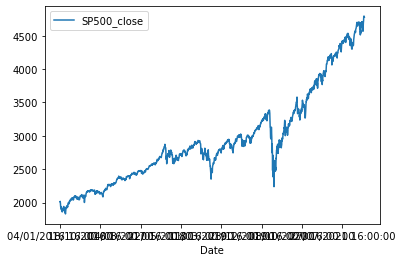

In [6]:
SP500_data.plot()

In [7]:
Stock_concat = pd.concat([Td_data, Bmo_data, RY_data, BNS_data, SP500_data], axis=1, join="inner", keys=["TD", "BMO", "RY", "BNS", "S&P 500"]).dropna().reset_index()

# Sort datetime index in ascending order (past to present)
Stock_concat = Stock_concat.sort_index()

# Display a few rows
Stock_concat.head()

,Date,TD,BMO,RY,BNS,S&P 500
,,TD_close,BMO_close,RY_close,BNS_close,SP500_close
0,04/01/2016 16:00:00,53.72,76.66,73.04,55.54,2012.66
1,05/01/2016 16:00:00,53.51,76.62,72.82,56.13,2016.71
2,07/01/2016 16:00:00,51.03,73.52,70.25,54.31,1943.09
3,11/01/2016 16:00:00,51.39,73.61,70.41,54.19,1923.67
4,12/01/2016 16:00:00,52.40,74.18,70.92,54.05,1938.68


In [8]:
type(Stock_concat["Date"])

Stock_concat["Date"] = pd.to_datetime(Stock_concat["Date"])
Stock_concat

,Date,TD,BMO,RY,BNS,S&P 500
,,TD_close,BMO_close,RY_close,BNS_close,SP500_close
0,2016-04-01 16:00:00,53.72,76.66,73.04,55.54,2012.66
1,2016-05-01 16:00:00,53.51,76.62,72.82,56.13,2016.71
2,2016-07-01 16:00:00,51.03,73.52,70.25,54.31,1943.09
3,2016-11-01 16:00:00,51.39,73.61,70.41,54.19,1923.67
4,2016-12-01 16:00:00,52.40,74.18,70.92,54.05,1938.68
...,...,...,...,...,...,...
1461,2021-12-21 16:00:00,94.70,133.14,131.57,87.69,4649.23
1462,2021-12-22 16:00:00,95.41,135.35,132.59,88.67,4696.56
1463,2021-12-23 16:00:00,96.21,135.58,133.64,89.31,4725.79


In [9]:
Stock_concat.set_index("Date", inplace=True)
Stock_concat.index = Stock_concat.index.date
Stock_concat

,TD,BMO,RY,BNS,S&P 500
,TD_close,BMO_close,RY_close,BNS_close,SP500_close
2016-04-01,53.72,76.66,73.04,55.54,2012.66
2016-05-01,53.51,76.62,72.82,56.13,2016.71
2016-07-01,51.03,73.52,70.25,54.31,1943.09
2016-11-01,51.39,73.61,70.41,54.19,1923.67
2016-12-01,52.40,74.18,70.92,54.05,1938.68
...,...,...,...,...,...
2021-12-21,94.70,133.14,131.57,87.69,4649.23
2021-12-22,95.41,135.35,132.59,88.67,4696.56
2021-12-23,96.21,135.58,133.64,89.31,4725.79


In [10]:
Stock_concat.describe()

,TD,BMO,RY,BNS,S&P 500
,TD_close,BMO_close,RY_close,BNS_close,SP500_close
count,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000
mean,70.401985,97.068022,99.543247,72.003015,2946.422306
std,9.777426,15.579969,14.196212,8.477017,714.147193
min,49.020000,56.240000,65.000000,46.720000,1829.080000
25%,63.210000,86.272500,92.972500,68.262500,2432.480000
50%,72.360000,97.720000,99.645000,74.470000,2797.915000
75%,75.917500,102.417500,105.197500,78.110000,3274.375000
max,97.510000,140.270000,134.790000,91.260000,4793.060000


In [11]:
Stock_concat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1466 entries, 2016-04-01 to 2021-12-30
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (TD, TD_close)          1466 non-null   float64
 1   (BMO, BMO_close)        1466 non-null   float64
 2   (RY, RY_close)          1466 non-null   float64
 3   (BNS, BNS_close)        1466 non-null   float64
 4   (S&P 500, SP500_close)  1466 non-null   float64
dtypes: float64(5)
memory usage: 68.7+ KB


In [12]:
## Evaluate the Riskiness of Stocks

In [13]:
volatility = Stock_concat.std() * np.sqrt(252)

In [14]:
volatility = volatility.sort_values()
volatility

BNS      BNS_close        134.568478
TD       TD_close         155.211827
RY       RY_close         225.357877
BMO      BMO_close        247.324342
S&P 500  SP500_close    11336.735237
dtype: float64

In [15]:
daily_returns = Stock_concat.pct_change().dropna()
daily_returns

,TD,BMO,RY,BNS,S&P 500
,TD_close,BMO_close,RY_close,BNS_close,SP500_close
2016-05-01,-0.003909,-0.000522,-0.003012,0.010623,0.002012
2016-07-01,-0.046346,-0.040459,-0.035293,-0.032425,-0.036505
2016-11-01,0.007055,0.001224,0.002278,-0.002210,-0.009994
2016-12-01,0.019654,0.007744,0.007243,-0.002584,0.007803
2016-01-13,-0.017176,-0.029388,-0.024958,-0.019426,-0.024965
...,...,...,...,...,...
2021-12-21,0.007661,0.012164,0.012155,0.009904,0.017778
2021-12-22,0.007497,0.016599,0.007753,0.011176,0.010180
2021-12-23,0.008385,0.001699,0.007919,0.007218,0.006224


In [16]:
Stock_concat.isnull().mean() * 100

TD       TD_close       0.0
BMO      BMO_close      0.0
RY       RY_close       0.0
BNS      BNS_close      0.0
S&P 500  SP500_close    0.0
dtype: float64

In [17]:
Stock_concat.isnull().sum()

TD       TD_close       0
BMO      BMO_close      0
RY       RY_close       0
BNS      BNS_close      0
S&P 500  SP500_close    0
dtype: int64

In [18]:
correlation = daily_returns.corr()
correlation

,,TD,BMO,RY,BNS,S&P 500
,,TD_close,BMO_close,RY_close,BNS_close,SP500_close
TD,TD_close,1.000000,0.840366,0.850373,0.848832,0.687715
BMO,BMO_close,0.840366,1.000000,0.825647,0.837803,0.681616
RY,RY_close,0.850373,0.825647,1.000000,0.832870,0.714775
BNS,BNS_close,0.848832,0.837803,0.832870,1.000000,0.658362
S&P 500,SP500_close,0.687715,0.681616,0.714775,0.658362,1.000000


<AxesSubplot:xlabel='None-None', ylabel='None-None'>

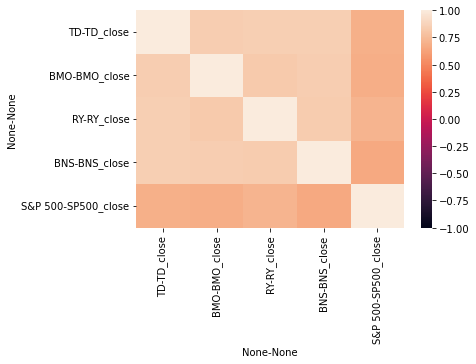

In [19]:
# Create a heatmap from the correlation values and adjust the scale
sns.heatmap(correlation, vmin=-1, vmax=1) 

<AxesSubplot:>

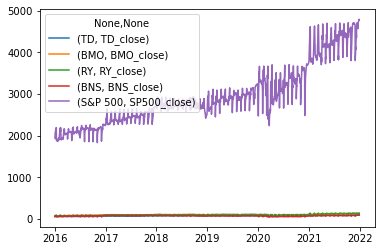

In [20]:
Stock_concat.plot()

<AxesSubplot:>

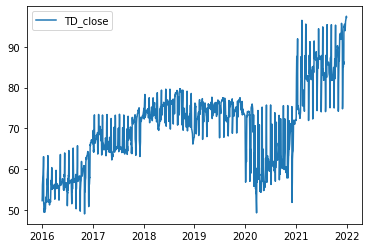

In [21]:
Stock_concat["TD"].plot()

<AxesSubplot:>

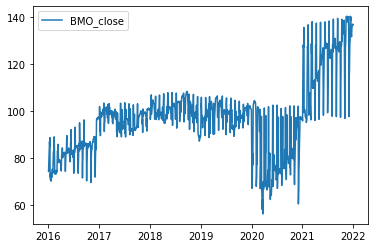

In [22]:
Stock_concat["BMO"].plot()

<AxesSubplot:>

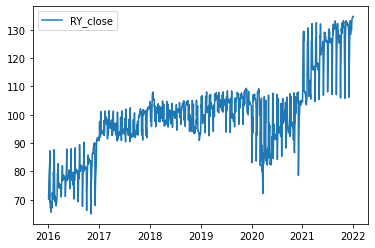

In [23]:
Stock_concat["RY"].plot()

<AxesSubplot:>

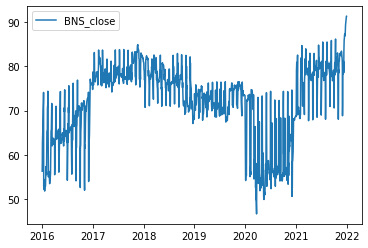

In [24]:
Stock_concat["BNS"].plot()

<AxesSubplot:>

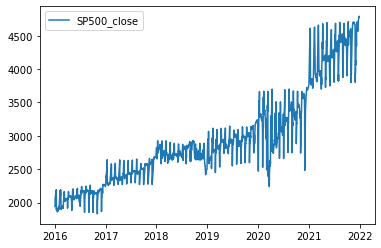

In [25]:
Stock_concat["S&P 500"].plot()

In [26]:
sma20 = Stock_concat.rolling(window=20).mean()
sma20.dropna()

,TD,BMO,RY,BNS,S&P 500
,TD_close,BMO_close,RY_close,BNS_close,SP500_close
2016-03-02,51.5275,73.3440,69.5400,54.3715,1914.8005
2016-04-02,51.4730,73.2365,69.4375,54.4375,1909.9400
2016-05-02,51.4175,73.1220,69.3535,54.4710,1903.1070
2016-08-02,51.4415,73.1225,69.3055,54.5395,1898.6245
2016-09-02,51.3860,73.0185,69.1670,54.5385,1895.0515
...,...,...,...,...,...
2021-12-21,94.5380,136.8745,129.7160,84.8210,4640.2255
2021-12-22,94.6605,136.7115,129.7640,85.1385,4640.9065
2021-12-23,94.7100,136.4980,129.8625,85.4340,4642.6610


In [27]:
sma50 = Stock_concat.rolling(window=50).mean()
sma50.dropna()

,TD,BMO,RY,BNS,S&P 500
,TD_close,BMO_close,RY_close,BNS_close,SP500_close
2016-03-17,52.3528,74.3554,70.2418,56.2274,1933.4610
2016-03-18,52.3860,74.3944,70.2854,56.3880,1934.1994
2016-03-21,52.4294,74.4428,70.3354,56.5386,1934.8972
2016-03-22,52.5158,74.5456,70.4262,56.7204,1937.0314
2016-03-23,52.5988,74.6470,70.5168,56.9020,1939.2922
...,...,...,...,...,...
2021-12-21,91.8448,136.5010,130.7542,82.9794,4609.4954
2021-12-22,92.0272,136.5940,130.8378,83.1854,4615.5998
2021-12-23,92.2376,136.7126,130.9446,83.4010,4623.1026


In [28]:
sma100 = Stock_concat.rolling(window=100).mean()
sma100.dropna()

,TD,BMO,RY,BNS,S&P 500
,TD_close,BMO_close,RY_close,BNS_close,SP500_close
2016-01-06,54.1268,77.5936,73.4706,59.8595,2000.8136
2016-02-06,54.1654,77.6536,73.5364,59.9586,2001.7396
2016-03-06,54.2028,77.7161,73.6008,60.0520,2002.5638
2016-06-06,54.2661,77.8144,73.6916,60.1675,2004.2270
2016-07-06,54.3298,77.9161,73.7870,60.2963,2006.1116
...,...,...,...,...,...
2021-12-21,87.9343,132.0145,129.8541,80.8873,4524.1814
2021-12-22,88.0559,132.1129,129.9136,80.9920,4527.1406
2021-12-23,88.1810,132.2073,129.9800,81.0986,4530.2070


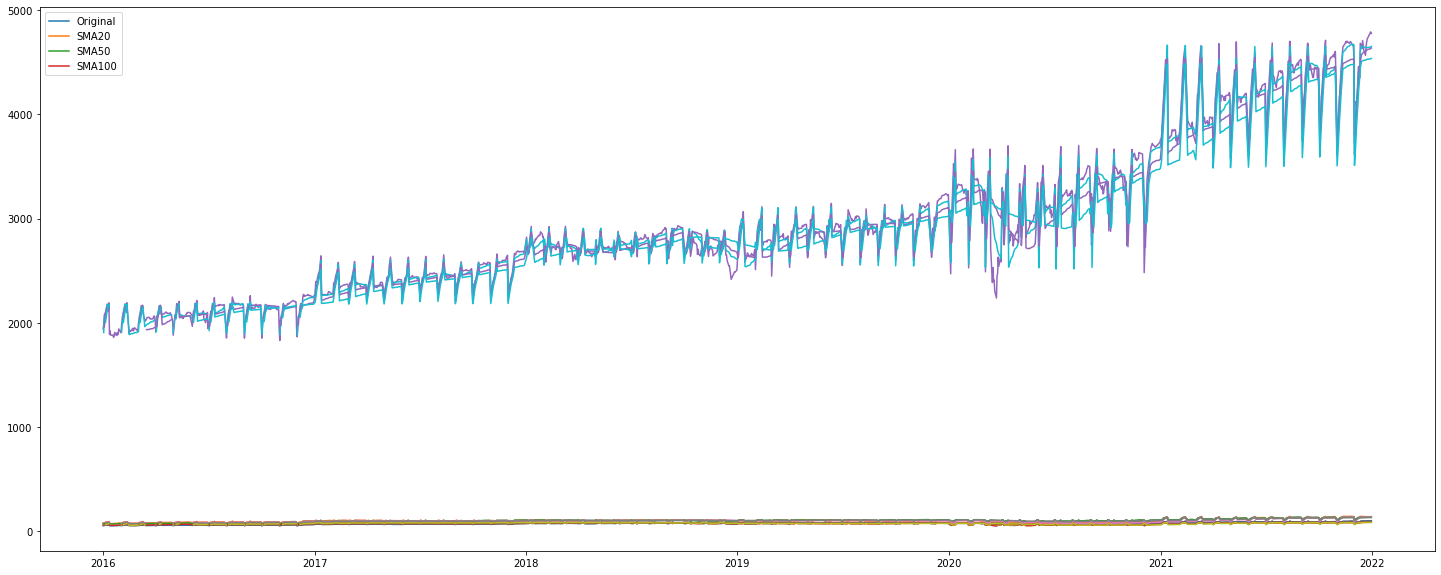

In [29]:
# Set figure of the daily closing prices of SHOP
ax = Stock_concat.plot(figsize=(25,10))

# Overlay SMA20, SMA50, and SMA100 on the same figure
sma20.plot(ax=ax)
sma50.plot(ax=ax)
sma100.plot(ax=ax)

# Set the legend of the figure
ax.legend(["Original", "SMA20", "SMA50", "SMA100"]);

In [30]:
from MCForecastTools import MCSimulation 

In [32]:
MCTd_data = pd.read_csv("Stock Data - TSE_TD.csv", infer_datetime_format=True, parse_dates=True, index_col="Date")
MCBmo_data = pd.read_csv("Stock Data - TSE_BMO (1).csv",infer_datetime_format=True, parse_dates=True, index_col="Date")
MCRY_data = pd.read_csv("Stock Data - TSE_RY (1).csv",  infer_datetime_format=True, parse_dates=True, index_col="Date")
MCBNS_data = pd.read_csv("Stock Data - TSE_BNS (2).csv",  infer_datetime_format=True, parse_dates=True, index_col="Date")
MCSP500_data = pd.read_csv("Stock Data - S&P 500 (1).csv",  infer_datetime_format=True, parse_dates=True, index_col="Date")

In [33]:
MCStock_concat = pd.concat([MCTd_data, MCBmo_data, MCRY_data, MCBNS_data, MCSP500_data], axis=1, join="inner", keys=["BMO", "TD", "BNS", "RY", "S&P 500"]).reset_index()
MCStock_concat

,Date,BMO,TD,BNS,RY,S&P 500
,,Close,Close,Close,Close,Close
0,2016-04-01 16:00:00,53.72,76.66,73.04,55.54,2012.66
1,2016-05-01 16:00:00,53.51,76.62,72.82,56.13,2016.71
2,2016-07-01 16:00:00,51.03,73.52,70.25,54.31,1943.09
3,2016-11-01 16:00:00,51.39,73.61,70.41,54.19,1923.67
4,2016-12-01 16:00:00,52.40,74.18,70.92,54.05,1938.68
...,...,...,...,...,...,...
1461,2021-12-21 16:00:00,94.70,133.14,131.57,87.69,4649.23
1462,2021-12-22 16:00:00,95.41,135.35,132.59,88.67,4696.56
1463,2021-12-23 16:00:00,96.21,135.58,133.64,89.31,4725.79


In [34]:
MCStock_concat["Date"] = pd.to_datetime(MCStock_concat["Date"])
MCStock_concat

,Date,BMO,TD,BNS,RY,S&P 500
,,Close,Close,Close,Close,Close
0,2016-04-01 16:00:00,53.72,76.66,73.04,55.54,2012.66
1,2016-05-01 16:00:00,53.51,76.62,72.82,56.13,2016.71
2,2016-07-01 16:00:00,51.03,73.52,70.25,54.31,1943.09
3,2016-11-01 16:00:00,51.39,73.61,70.41,54.19,1923.67
4,2016-12-01 16:00:00,52.40,74.18,70.92,54.05,1938.68
...,...,...,...,...,...,...
1461,2021-12-21 16:00:00,94.70,133.14,131.57,87.69,4649.23
1462,2021-12-22 16:00:00,95.41,135.35,132.59,88.67,4696.56
1463,2021-12-23 16:00:00,96.21,135.58,133.64,89.31,4725.79


In [35]:
MCStock_concat.set_index("Date", inplace=True)
MCStock_concat.index = MCStock_concat.index.date
MCStock_concat.rename(columns={"Close": "close"}, inplace=True)

In [49]:
MCStock_concat.head

<bound method NDFrame.head of               BMO      TD     BNS     RY  S&P 500
            close   close   close  close    close
2016-04-01  53.72   76.66   73.04  55.54  2012.66
2016-05-01  53.51   76.62   72.82  56.13  2016.71
2016-07-01  51.03   73.52   70.25  54.31  1943.09
2016-11-01  51.39   73.61   70.41  54.19  1923.67
2016-12-01  52.40   74.18   70.92  54.05  1938.68
...           ...     ...     ...    ...      ...
2021-12-21  94.70  133.14  131.57  87.69  4649.23
2021-12-22  95.41  135.35  132.59  88.67  4696.56
2021-12-23  96.21  135.58  133.64  89.31  4725.79
2021-12-29  97.51  136.94  134.79  91.22  4793.06
2021-12-30  97.24  136.59  134.46  91.26  4778.73

[1466 rows x 5 columns]>

In [52]:
MCStock_concat = MCStock_concat.pct_change()
MCStock_concat.head()

,BMO,TD,BNS,RY,S&P 500
,close,close,close,close,close
2016-07-01,NaN,NaN,NaN,NaN,NaN
2016-11-01,-1.106138,-1.013460,-1.099330,-0.770044,-0.962060
2016-12-01,-2.549972,-6.169189,-3.048085,-1.181627,1.452040
2016-01-13,-2.049281,-1.900402,-3.039040,37.519468,1.358348
2016-01-14,-0.593050,-0.687971,-0.720318,-1.247244,-0.602633


In [53]:
MCStock_concat = MCStock_concat.dropna()
MCStock_concat.head()

,BMO,TD,BNS,RY,S&P 500
,close,close,close,close,close
2016-11-01,-1.106138,-1.013460,-1.099330,-0.770044,-0.962060
2016-12-01,-2.549972,-6.169189,-3.048085,-1.181627,1.452040
2016-01-13,-2.049281,-1.900402,-3.039040,37.519468,1.358348
2016-01-14,-0.593050,-0.687971,-0.720318,-1.247244,-0.602633
2016-01-15,-11.225402,1.048557,4.600765,0.943915,0.374476


In [54]:
MC_even_dist = MCSimulation(
    portfolio_data = MCStock_concat,
    weights = [.20,.20,.20, .20, .20],
    num_simulation = 1000,
    num_trading_days = 252*5
)

MC_even_dist.portfolio_data.head()

BMO                     TD                    BNS  \
                close daily_return     close daily_return     close   
2016-11-01  -1.106138          NaN -1.013460          NaN -1.099330   
2016-12-01  -2.549972     1.305293 -6.169189     5.087253 -3.048085   
2016-01-13  -2.049281    -0.196351 -1.900402    -0.691953 -3.039040   
2016-01-14  -0.593050    -0.710606 -0.687971    -0.637987 -0.720318   
2016-01-15 -11.225402    17.928254  1.048557    -2.524130  4.600765   

                                RY                S&P 500               
           daily_return      close daily_return     close daily_return  
2016-11-01          NaN  -0.770044          NaN -0.962060          NaN  
2016-12-01     1.772674  -1.181627     0.534493  1.452040    -2.509303  
2016-01-13    -0.002967  37.519468   -32.752382  1.358348    -0.064524  
2016-01-14    -0.762978  -1.247244    -1.033243 -0.602633    -1.443652  
2016-01-15    -7.387128   0.943915    -1.756801  0.374476    -1.621399

In [48]:
daily_returns = MC_even_dist.drop("close")
daily_returns

AttributeError: 'MCSimulation' object has no attribute 'drop'

In [38]:
 # Calculate covariance of all daily returns of social media stocks vs. S&P 500
BMO_covariance = daily_returns["BMO"].cov(daily_returns["S&P 500"])
TD_covariance = daily_returns["TD"].cov(daily_returns["S&P 500"])
BNS_covariance = daily_returns["BNS"].cov(daily_returns["S&P 500"])

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [40]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/adeife/Desktop/Fintech-Project-1/Fintech-Project-1/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993708,0.996291,0.997721,1.009601,0.997228,1.002065,1.006122,0.998676,1.000981,0.999170,...,1.006522,0.996258,0.997488,0.998319,0.994144,1.000192,0.990148,0.994985,0.999837,0.997735
2,0.996350,1.003783,0.991719,1.003178,0.996971,0.995928,1.000467,1.004556,0.999161,1.006895,...,1.017295,0.992836,1.004325,1.003115,0.999489,1.006154,0.986229,0.993701,0.993046,1.002798
3,0.992611,1.001556,0.993713,1.007776,0.991073,0.998278,0.994968,1.006742,1.000715,1.007789,...,1.022257,0.998797,1.005646,1.000284,0.986902,1.006019,0.981841,0.987691,0.992675,1.008733
4,0.995096,1.005774,0.992810,1.006582,0.996009,0.997484,0.997817,1.013703,1.004790,1.008413,...,1.020748,1.004143,1.002332,0.996860,0.975612,0.996041,0.971532,0.979756,0.994043,1.019908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.638138,1.159916,2.003133,1.963784,2.149701,1.703724,2.415391,2.629972,1.933050,2.355070,...,1.702204,1.802659,1.727139,1.528809,1.628127,2.092942,2.698905,1.604714,2.926871,2.013449
1257,1.635609,1.162457,1.993973,1.970148,2.158722,1.710749,2.407958,2.634529,1.936290,2.360208,...,1.695891,1.792291,1.715091,1.532555,1.632793,2.093732,2.712370,1.594566,2.924227,2.006427
1258,1.635366,1.162408,1.991485,1.979160,2.171599,1.701449,2.397280,2.631606,1.949959,2.358351,...,1.683474,1.804531,1.704437,1.531212,1.636604,2.089492,2.735350,1.626092,2.921026,2.006190
1259,1.654323,1.158723,1.966941,2.005494,2.173952,1.680369,2.404201,2.611112,1.974099,2.349616,...,1.677537,1.805122,1.703064,1.535236,1.624692,2.078495,2.728651,1.619906,2.907112,2.001467


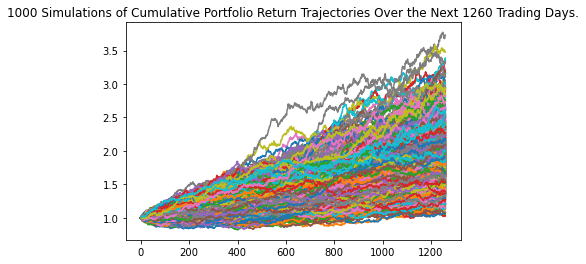

In [41]:
line_plot = MC_even_dist.plot_simulation()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/adeife/Desktop/Fintech-Project-1/Fintech-Project-1/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

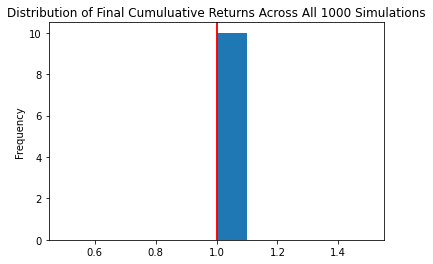

In [55]:
dist_plot = MC_even_dist.plot_distribution()

In [ ]:
MC_sum = MC_even_dist.summarize_cumulative_return()
MC_sum